### Taller 1.5
Andrea Sofía Daza
(202122293)

In [125]:
#Importar librerías
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols
from sympy import symbols, sin, pi,sqrt,diff, Function
from sympy import integrate
import numpy as np
import sympy
import matplotlib.pyplot as plt

Punto 1. Derive las ecuaciones de aceleración en coordenadas polares. Identifique los términos en las componentes radial y tangencial

In [118]:
#Punto 1
from sympy import symbols, Function, diff

r, theta = symbols('r theta')
rdotdot = Function('rdotdot')(theta)
rdot = Function('rdot')(theta)
thetadot = Function('thetadot')(theta)

a_radial = rdotdot - r * thetadot**2
print('Aceleración radial: ',a_radial)

a_theta =  r * thetadot**2 +2*rdot*thetadot
print('Aceleración theta: ',a_theta)

Aceleración radial:  -r*thetadot(theta)**2 + rdotdot(theta)
Aceleración theta:  r*thetadot(theta)**2 + 2*rdot(theta)*thetadot(theta)


Punto 2. Una partícula inicia en reposo en el punto O en el instante t= 0. La partícula acelera con aceleración tangencial constante a_t mientras recorre la ranura en la dirección ccw. Determine theta y thetadot como funciones del tiempo durante la primera revolución de la partícula en la ranura.


In [128]:
#Punto 2

N = ReferenceFrame('N')
t,a_c = symbols('t,a_c') #donde t es tiempo, b es el radio del círculo, y a_c es la aceleración tangencial constante
theta,r = dynamicsymbols('theta,r') #definimos variables en función del tiempo
rvec= r*N.x
rdot = rvec.express(N).dot(N.x).diff(t)
rdot
#De la ecuación de cinemática s = s0 + 1/2(a_c*t^2)
#Se asume que s0 = 0 y que s (distancia) es igual al radio multiplicado por el ánguloi theta, por definición de longitud de arco.

theta = a_c*t**2/(2*r)
theta
tvec= theta*N.x
thetadot = tvec.express(N).dot(N.x).diff(t)
thetadot


print('r:',r)
print('rdot: ',rdot)
print('theta: ',theta)
print('thetadot: ', thetadot)

r: r(t)
rdot:  Derivative(r(t), t)
theta:  a_c*t**2/(2*r(t))
thetadot:  -a_c*t**2*Derivative(r(t), t)/(2*r(t)**2) + a_c*t/r(t)


Punto 3. Una partícula inicia en reposo en el punto O en el instante t=0. La partícula se acelera con aceleración tangencial constante a_a mientras recorre la ranura en dirección ccw. Determine r, rdot, theta, y thetadot como funciones del tiempo durante la primera revolución de la partícula en la ranura.

In [120]:
#Punto 3
N = ReferenceFrame('N')
t,b,a_c = symbols('t,b,a_c') #donde t es tiempo, b es el radio del círculo, y a_c es la aceleración tangencial constante
theta,r = dynamicsymbols('theta,r') #definimos variables en función del tiempo
r= 2*b*sin(a_c*t**2/(4*b))
rvec= r*N.x
rdot = rvec.express(N).dot(N.x).diff(t)
rdot
#De la ecuación de cinemática s = s0 + 1/2(a_c*t^2)
#Se asume que s0 = 0 y que s (distancia) es igual al ángulo theta, al ser esta la distancia recorrida

theta = a_c*t**2/(2*b)
theta
tvec= theta*N.x
thetadot = tvec.express(N).dot(N.x).diff(t)
thetadot

print('r:',r)
print('rdot: ',rdot)
print('theta: ',theta)
print('thetadot: ', thetadot)


r: 2*b*sin(a_c*t**2/(4*b))
rdot:  a_c*t*cos(a_c*t**2/(4*b))
theta:  a_c*t**2/(2*b)
thetadot:  a_c*t/b


Punto 4. La rotación del brazo está programada para seguir la trayectoria theta = 0.2*t + 0.02*t^3. El tornillo controla la posición final del bloque B siguiendo la trayectoria r = 0.2 + 0.04*t^2. Calcule y grafique la posición del bloque B en el tiempo durante los primeros tres segundos del movimiento. Encuentre la velocidad y aceleración total en el instante t=3. 

La velocidad para t = 3 es:  0.478881363178815 .
La aceleración para t = 3 es: 0.601164854541581 .


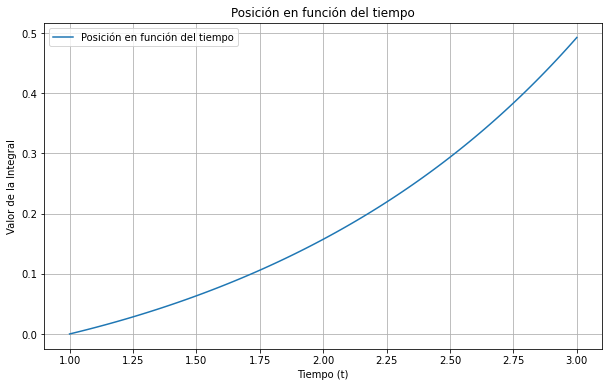

In [51]:
#Punto 4

N = ReferenceFrame('N')
t,b,a_c,v_r,v_t,v,a,a_r,a_t = symbols('t,b,a_c,v_r,v_t,v,a,a_r,a_t') 
theta,r = dynamicsymbols('theta,r')
theta= 0.2*t+0.02*t**3
r = 0.2+0.04*t**2
rvec= r*N.x
rdot = rvec.express(N).dot(N.x).diff(t)
rdot
tvec= theta*N.x
thetadot = tvec.express(N).dot(N.x).diff(t)
thetadot 

v = sqrt(rdot**2+(r*thetadot)**2)
rdot_dot = rdot.diff(t)
rdot_dot
thetadot_dot = thetadot.diff(t)
a = sqrt((rdot_dot-r*thetadot**2)**2+(r*thetadot_dot+2*rdot*thetadot)**2)
a

#Calculamos valor de velocidad y aceleración para t = 3
t_valor = 3
v_valor_t3 = v.subs(t, t_valor)
a_valor_t3 = a.subs(t, t_valor)

print("La velocidad para t = 3 es: ", v_valor_t3, ".")
print("La aceleración para t = 3 es:", a_valor_t3, ".")

#Necesitamos hallar la posición, se debe integrar la velocidad. 
posicion = integrate(v,(t, 1, 3))
posicion
#Gráfica
tiempo = np.linspace(1,3,100)
integral_values = [integrate(v, (t, 1, t_val)).evalf() for t_val in tiempo]

# Parámetros
plt.figure(figsize=(10, 6))
plt.plot(tiempo, integral_values, label='Posición en función del tiempo')
plt.xlabel('Tiempo (t)')
plt.ylabel('Valor de la Integral')
plt.title('Posición en función del tiempo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Punto 5. Una repartidora lleva un paquete en un ascensor que se acelera hacia arriba con una aceleración de g/4. Determine la fuerza que el piso del ascensor ejerce sobre los pies y la fuerza que la repartidora ejerce sobre el paquete para sostenerlo.

![Alt text](image-15.png)

In [138]:
#Punto 5
#Fuerza reacción del piso
m_m = 60
m_c = 4
g = 9.81
a = g/4

FR_1 = (m_m+m_c)*a+(m_m+m_c)*(g) #unidades en Newtons
print(FR_1, 'N')

FR_2 = (m_c)*(a)+(m_c)*(g)
print(FR_2, 'N')

784.8000000000001 N
49.050000000000004 N


Punto 6. Una esfera de 10 kg está suspendida en un margo de 15 kg. Si el coeficiente de fricción entre el marco y el piso es de 0.15, calcule la tensión en cada uno de los cables (A y B).

![Alt text](image-13.png)

In [135]:
#Punto 6
import numpy as np
from sympy import symbols, cos,sin 

t,theta,m_e,m_m,coef,T1,T2,g = symbols('t,theta,m_e,m_m,coef,T1,T2,g') 
g = 9.81
m_e = 10
m_m = 15
coef = 0.15
theta = 20 * (pi / 180)

N = (m_e+m_m)*cos(np.deg2rad(20))

a = coef*N/(m_e+m_m)
a
Fr = coef*N
T1 = sympy.Symbol('T1')
T2 = sympy.Symbol('T2')

ec1 = sympy.Eq(m_e*a+T2*cos(np.deg2rad(45))-T1*cos(np.deg2rad(45)), Fr)
ec2 = sympy.Eq(T1*sin(np.deg2rad(45))+ T2*sin(np.deg2rad(45))+ m_e*g, 0)

sol = sympy.solve([ec1, ec2], # Lista de ecuaciones
                  [T1, T2]) # Lista de símbolos
sol



{T1: -70.8622170392749, T2: -67.8721334295258}

Punto 7. Encuentre la expresión para el movimiento de la masa B en función del ángulo de la barra (theta). Grafique el desplazamiento de la barra B respecto al ángulo de la barra para r = 1 m. 

![Alt text](image-14.png)

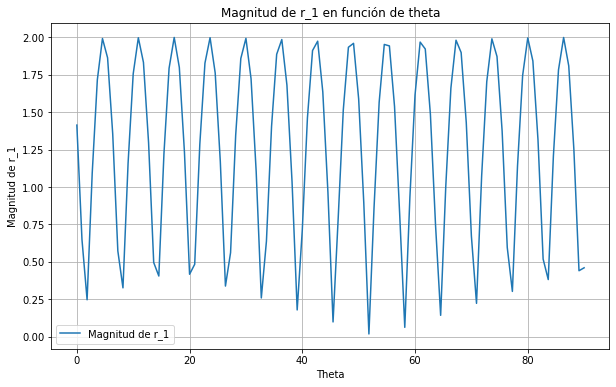

In [127]:
from sympy import symbols, cos, sin, sqrt
import numpy as np
import matplotlib.pyplot as plt

N = ReferenceFrame('N')
theta, r, r_2 = symbols('theta r r_2')  # Variables 
r = 1
r_2 = 1
rvec = r * cos(theta) * N.x + r * sin(theta) * N.y
r_2vec = r_2 * N.y
r_1 = rvec - r_2vec

theta_valores = np.linspace(0, 90, 100)
r_1_magnitudes = []  # Lista

# Calcular r_1 para cada valor de theta y calcular su magnitud
for theta_val in theta_valores:
    r_1_val = r_1.subs(theta, theta_val)
    r_1_magnitud = sqrt(r_1_val & r_1_val) 
    r_1_magnitudes.append(r_1_magnitud)

# Parámetros
plt.figure(figsize=(10, 6))
plt.plot(theta_valores, r_1_magnitudes, label='Magnitud de r_1')
plt.xlabel('Theta')
plt.ylabel('Magnitud de r_1')
plt.title('Magnitud de r_1 en función de theta')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Punto 8. Encuentre la expresión para la tensión de la cuerda en función del movimiento de la barra. Suponga que r = 1 m, Mb = 1 kg. Además, la barra se mueve desde 70° hasta 30° con una velocidad angular constante de 1 rad/s. Grafique la tensión de la cuerda durante este recorrido.

In [ ]:
#Punto 8
